In [1]:
import pandas as pd
import numpy as np
import codecs
%matplotlib inline

ModuleNotFoundError: No module named 'pandas'

## Load original dataset and some basic info.

In [52]:
train_orig = pd.read_table("data/train.tsv")
train_orig.head()

,train_id,name,item_condition_id,category_name,brand_name,price,shipping,item_description
0,0,MLB Cincinnati Reds T Shirt Size XL,3,Men/Tops/T-shirts,NaN,10.0,1,No description yet
1,1,Razer BlackWidow Chroma Keyboard,3,Electronics/Computers & Tablets/Components & P...,Razer,52.0,0,This keyboard is in great condition and works ...
2,2,AVA-VIV Blouse,1,Women/Tops & Blouses/Blouse,Target,10.0,1,Adorable top with a hint of lace and a key hol...
3,3,Leather Horse Statues,1,Home/Home Décor/Home Décor Accents,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...
4,4,24K GOLD plated rose,1,Women/Jewelry/Necklaces,NaN,44.0,0,Complete with certificate of authenticity


In [53]:
print("DataFrame shape: {}".format(train_orig.shape))
print("DataFrame dtype:")
train_orig.dtypes

DataFrame shape: (593376, 8)
DataFrame dtype:


train_id               int64
name                  object
item_condition_id      int64
category_name         object
brand_name            object
price                float64
shipping               int64
item_description      object
dtype: object

##  Data Exploration
### Check missing:

In [54]:
train_orig.apply(lambda x: sum(x.isnull()))

train_id                  0
name                      0
item_condition_id         0
category_name          2541
brand_name           253017
price                     0
shipping                  0
item_description          1
dtype: int64

### how often values appear in columns

In [55]:
var = ['item_condition_id', 'shipping', 'category_name','brand_name']
for v in var:
    print ('\nHow often values appear in column >>{}<<'.format(v))
    print (train_orig[v].value_counts())


How often values appear in column >>item_condition_id<<
1    256121
3    172980
2    150564
4     12738
5       973
Name: item_condition_id, dtype: int64

How often values appear in column >>shipping<<
0    328556
1    264820
Name: shipping, dtype: int64

How often values appear in column >>category_name<<
Women/Athletic Apparel/Pants, Tights, Leggings                 23840
Women/Tops & Blouses/T-Shirts                                  18570
Beauty/Makeup/Face                                             13731
Beauty/Makeup/Lips                                             11878
Electronics/Video Games & Consoles/Games                       10644
Beauty/Makeup/Eyes                                             10232
Electronics/Cell Phones & Accessories/Cases, Covers & Skins     9879
Women/Underwear/Bras                                            8588
Women/Tops & Blouses/Tank, Cami                                 8169
Women/Tops & Blouses/Blouse                                     8157
W

### Sort "category_name" into levels 
1. The column "category_name" will be sorted into 5 levels
2. Null entries will be replace by "NA"
3. Column "category_name" will be droped
4. Values in each category level will be counted again

In [56]:
def sort_category(dataset):
    cat_nbr = list()
    # sort out all categories
    category_set = set(["NA"])
    n_lvl = 5
    category_lvls = list()
    category_lvls_idx = list()
    category_lvls_name = ["cat_lvl_"+str(x) for x in range(n_lvl)]
    for i, v in dataset["category_name"].iteritems():
        category_lvls_idx.append(i)
        if not pd.isnull(v):
            cate_ls = v.split("/")
            cate_ls = tuple(cate_ls+["NA"]*(n_lvl-len(cate_ls)))
            category_lvls.append(cate_ls)
            cat_nbr.append(len(cate_ls))
            category_set |= set(cate_ls)
        else:
            category_lvls.append(["NA"]*n_lvl)
    category_lvls = pd.DataFrame(category_lvls, index=category_lvls_idx, columns=category_lvls_name)
    return category_lvls, category_set

# modify "category_name"
cg_lvls, cg_set = sort_category(train_orig)
train_mod = pd.concat([train_orig, cg_lvls], axis=1)
train_mod.drop("category_name", axis=1, inplace=True)
train_mod.head()

,train_id,name,item_condition_id,brand_name,price,shipping,item_description,cat_lvl_0,cat_lvl_1,cat_lvl_2,cat_lvl_3,cat_lvl_4
0,0,MLB Cincinnati Reds T Shirt Size XL,3,NaN,10.0,1,No description yet,Men,Tops,T-shirts,NA,NA
1,1,Razer BlackWidow Chroma Keyboard,3,Razer,52.0,0,This keyboard is in great condition and works ...,Electronics,Computers & Tablets,Components & Parts,NA,NA
2,2,AVA-VIV Blouse,1,Target,10.0,1,Adorable top with a hint of lace and a key hol...,Women,Tops & Blouses,Blouse,NA,NA
3,3,Leather Horse Statues,1,NaN,35.0,1,New with tags. Leather horses. Retail for [rm]...,Home,Home Décor,Home Décor Accents,NA,NA
4,4,24K GOLD plated rose,1,NaN,44.0,0,Complete with certificate of authenticity,Women,Jewelry,Necklaces,NA,NA


In [57]:
var = ['cat_lvl_0', 'cat_lvl_1', 'cat_lvl_2','cat_lvl_3','cat_lvl_4' ]
for v in var:
    print ('\nHow often values appear in column >>{}<<'.format(v))
    print (train_mod[v].value_counts())


How often values appear in column >>cat_lvl_0<<
Women                     265870
Beauty                     83315
Kids                       68404
Electronics                49173
Men                        37508
Home                       27331
Vintage & Collectibles     18673
Other                      18251
Handmade                   12257
Sports & Outdoors          10053
NA                          2541
Name: cat_lvl_0, dtype: int64

How often values appear in column >>cat_lvl_1<<
Athletic Apparel             53372
Makeup                       49972
Tops & Blouses               42811
Shoes                        40242
Jewelry                      24754
Toys                         23286
Cell Phones & Accessories    21316
Women's Handbags             18385
Dresses                      18211
Women's Accessories          16963
Jeans                        14457
Video Games & Consoles       14402
Sweaters                     14164
Underwear                    13579
Skin Care          

### Basic statistic in sub-categories

In [58]:
category_df = train_mod[["cat_lvl_0", "cat_lvl_1", "cat_lvl_2", "price"]]
cat_group = category_df.groupby(["cat_lvl_0", "cat_lvl_1", "cat_lvl_2"]).describe()
cat_group.head()

price                        \
                                                 count       mean        std   
cat_lvl_0 cat_lvl_1   cat_lvl_2                                                
Beauty    Bath & Body Bath                      2103.0  18.196386  15.968271   
                      Bathing Accessories        131.0  21.870229  11.088731   
                      Cleansers                  279.0  13.695341  11.281726   
                      Other                       49.0  23.081633  18.210387   
                      Scrubs & Body Treatments   327.0  23.764526  21.918062   

                                                                              
                                                min   25%   50%   75%    max  
cat_lvl_0 cat_lvl_1   cat_lvl_2                                               
Beauty    Bath & Body Bath                      0.0   9.0  14.0  22.0  160.0  
                      Bathing Accessories       5.0  12.0  20.0  30.0   68.0  
                      Cleansers                 3.0   7.0  10.0  16.0   86.0  
                      Other                     3.0  10.0  16.0  29.0   94.0  
                      Scrubs & Body Treatments  3.0  12.0  18.0  26.5  200.0

### Modify "brand_name"
empty value will be replaced by "noname"

In [59]:
train_mod.loc[pd.isnull(train_mod["brand_name"]), "brand_name"] = "noname"

### Basic statistic for brands

In [60]:
price_df = train_mod[["brand_name", "price"]]
price_group = price_df.groupby(["brand_name"]).describe()
price_group.head()

price                                               
                     count   mean       std   min   25%   50%   75%   max
brand_name                                                               
% Pure                20.0  13.85  5.537195   5.0   9.0  13.5  16.5  24.0
10.Deep                1.0  21.00       NaN  21.0  21.0  21.0  21.0  21.0
21men                  1.0  10.00       NaN  10.0  10.0  10.0  10.0  10.0
24/7 Comfort Apparel   1.0  10.00       NaN  10.0  10.0  10.0  10.0  10.0
2K Games               1.0   9.00       NaN   9.0   9.0   9.0   9.0   9.0

### Calc log-price due to biased distribution of price

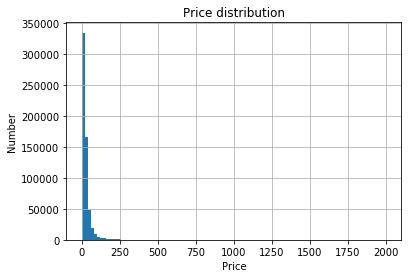

In [61]:
fig = train_mod["price"].hist(bins=100)
fig.set_title("Price distribution")
fig.set_xlabel("Price")
fig.set_ylabel("Number")

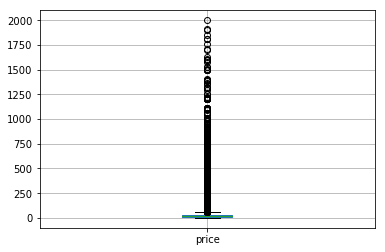

In [62]:
train_mod.boxplot(column='price',return_type='axes')

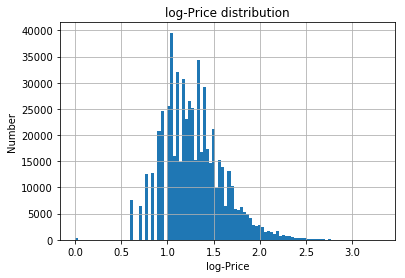

In [63]:
train_mod["pricelog"] = pd.Series(np.log10(train_mod["price"]+1), index=train_mod["price"].index)
fig = train_mod["pricelog"].hist(bins=100)
fig.set_title("log-Price distribution")
fig.set_xlabel("log-Price")
fig.set_ylabel("Number")

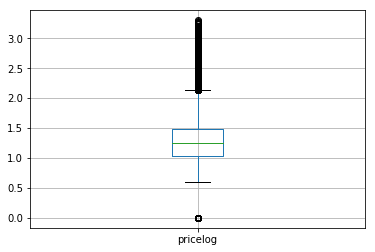

In [64]:
train_mod.boxplot(column='pricelog',return_type='axes')

**Notice:** some prices are zero 

### Numerical Coding (for object dtype):

In [68]:
train_mod.dtypes
col_to_encode = ["brand_name", "cat_lvl_0", "cat_lvl_1","cat_lvl_2","cat_lvl_3","cat_lvl_4"]
for col in col_to_encode:
    train_mod[col] = train_mod[col].astype('category').cat.codes
train_mod.dtypes

train_id               int64
name                  object
item_condition_id      int64
brand_name             int16
price                float64
shipping               int64
item_description      object
cat_lvl_0               int8
cat_lvl_1               int8
cat_lvl_2              int16
cat_lvl_3               int8
cat_lvl_4               int8
pricelog             float64
dtype: object

### Using One-Hot Coding to avoid orderial categories

In [66]:
train_mod_oh = pd.get_dummies(train_mod, columns=col_to_encode+["shipping"])
train_mod_oh.columns

Index(['train_id', 'name', 'item_condition_id', 'price', 'item_description',
       'pricelog', 'brand_name_0', 'brand_name_1', 'brand_name_2',
       'brand_name_3',
       ...
       'cat_lvl_3_1', 'cat_lvl_3_2', 'cat_lvl_3_3', 'cat_lvl_3_4',
       'cat_lvl_3_5', 'cat_lvl_4_0', 'cat_lvl_4_1', 'cat_lvl_4_2',
       'shipping_0', 'shipping_1'],
      dtype='object', length=4724)

In [67]:
# one-hot coding is sparse and generate a large file
# train_mod_oh.to_pickle("train_mod_1hot.pkl")
# save the file for further use
train_mod.to_pickle("train_mod.pkl")